Bollinger Bands: Bollinger Bands consist of a center line and two price channels (bands) above and below it. The center line is an exponential moving average

Periods of low volatility(bandswidth contraction) generally tend to be followed by periods of high volatility(expansion) and vice versa. When stock prices continually touch the upper Bollinger Band®, the prices are thought to be overbought; conversely, when they continually touch the lower band, prices are thought to be oversold, triggering a buy signal.

In [8]:
import requests
import os
import csv

base_url = 'https://www.alphavantage.co/query?'
api_key = os.environ.get('ALPHA_ADVANTAGE', None)
params = {'function':'BBANDS',
          'interval':'daily',
          'time_period':200,
          'series_type':'close',
          'symbol':'amzn',
          'apikey': api_key}

response = requests.get(base_url, params=params)
data = response.json()

In [24]:
from dateutil.parser import parse

bandwidth = []
timestamps = []
high = []
low = []
for timestamp, values in data['Technical Analysis: BBANDS'].items():
    high.append(float(values['Real Upper Band']))
    low.append(float(values['Real Lower Band']))
    bandwidth.append(float(values['Real Upper Band'])-float(values['Real Lower Band']))
    timestamps.append(parse(timestamp))

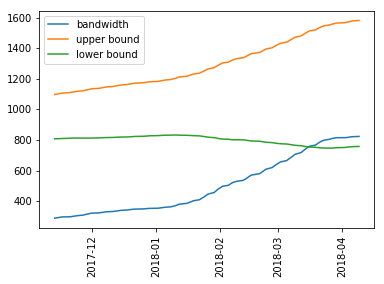

In [28]:
import matplotlib.pyplot as plt 
plt.plot(timestamps[:100], bandwidth[:100], label="bandwidth")
plt.plot(timestamps[:100], high[:100], label="upper bound")
plt.plot(timestamps[:100], low[:100], label="lower bound")
plt.legend()
plt.xticks(rotation=90)
plt.show()